# Project Business Statistics: E-news Express

**Marks: 60**


## Define Problem Statement and Objectives

####*Enhancing E-News Engagement*

E-news Express is a niche online news portal offering their patrons access to global stories and events, with the benefits of faster access and interactive elements such as audio, graphics, and video. By analyzing the actions of each website visitor based on their interests, the company aims to gain insights into user preferences and enhance engagement strategies.

####*Problem Statement*

Recently, C-suite at E-news Express have recognized a decrease in the number of monthly subscribers, possibly due to deficiencies in the current webpage design, particularly in terms of layout and recommended content, which fail to sufficiently engage visitors and prompt them to subscribe.

####*Objective*

I've been hired as a Data Scientist on the E-news Express team with the goal of analyzing user interest, inspiring engagement, and ultimately increasing the number of subscribers. I plan to carry this out by examining the performance of the updated landing page in recruiting new subscribers. Thus, my control group is defined as the current landing page and my treatment group is defined as the new landing page. Below, please find our target questions:

1. Are users spending a greater amount of time on the new landing page compared to the existing one?
2. Are the conversion rates higher on the new page in comparison to the old one?
3. Does the choice of preferred language influence the conversion status?
4. Is the duration spent on the new page consistent across users of different languages?


## Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Data Dictionary:

user_id - refers to the unique user ID of website visitor

group - represents the intended experimental condition for each user, control vs treatment

landing_page - indicates the new or the old landing page

time_spent_on_the_page - refers to the duration, measured in minutes, that a visitor remains engaged with the landing page

converted - denotes whether the user has become a subscriber of the news portal or not

language_preferred - indicates the language opted for by the user to view the landing page

In [ ]:
df.shape

(100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Total Missing Values:\n{df.isnull().sum()}")

Total Missing Values:
user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


####Observations
This data set has 6 columns of interest and 100 rows of observations, which we are assuming is a simple random sample from the population, a good number to work with. Each sample observation is also assumed to be independent of each other. Data types include two numerical columns, one decimal (float64) and one integer (int64), and the remaining 4 columns are categorical (object). This is a pretty clean data set as there are no missing nor duplicate values. It can be noted that the average time spent on the landing page is about 5.4 minutes, and the longest time is just under eleven minutes, at 10.77. Between 5 to 10 minutes is a good amount of time to for the visitor to at least read a few headlines, if not an entire news story, along with possibly interacting with different aspects of the website, such as watching a video. During these critical minutes, it should be our company goal at E-News Express to prompt the visitor to consider a subscription. Something to note is that the shortest amount of time spent on the landing page is under a minute, 0.19, which is about 11 seconds. This raises the question if the user is visiting the page for that short of a time, is there a lack of content catching their eye, or is there something actually driving the user away from the page? Another observation is that of the 100 observations, 54 were converted from visitors to subscribers, so though the decline is an issue we are working to understand and solve, the odds are still in our favor. It can be seen that the most popular language preferred is Spanish, representing 34% of the observations.

### Univariate Analysis

In [ ]:
print("Number of visitors leaving without subscribing:",df.loc[df['converted']=="no"].value_counts().sum())

Number of visitors leaving without subscribing: 46


####Observations
Using method value_counts, I found that of the 100 observations there were 46 vistors to the site that left without subscribing, this is our target population! While this is not the majority, we are looking as to why they could possibly leave the site before becoming a patron.

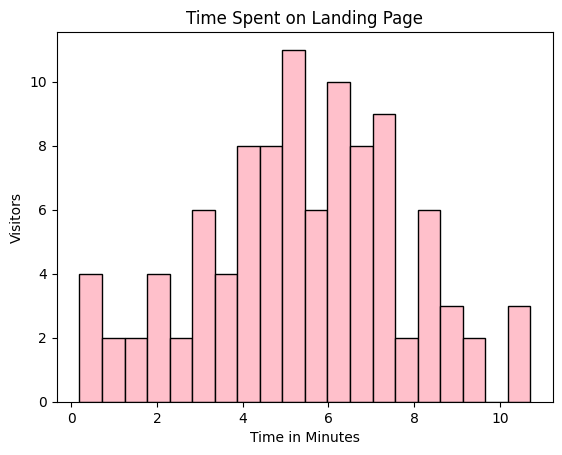

In [ ]:
df['time_spent_on_the_page'].plot(kind='hist', bins=20, title='Time Spent on Landing Page', color='pink', edgecolor='black')
plt.xlabel('Time in Minutes')
plt.ylabel('Visitors');

####Observations
Taking a glance at the time spent on the landing page over both the new and old versions (both control and treatment groups), the distribution is arguably pretty normal, with the average in the middle.

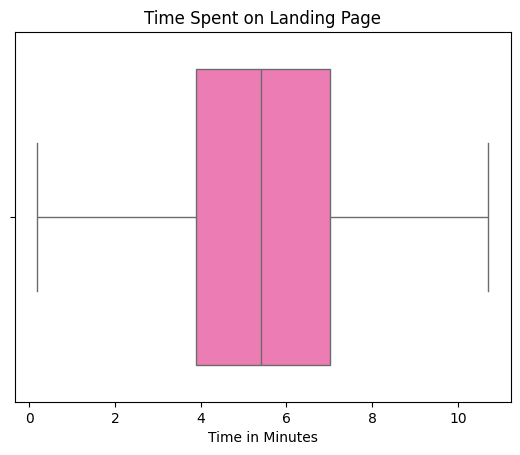

In [ ]:
sns.boxplot(data=df['time_spent_on_the_page'], orient='h', color="hotpink")
plt.title('Time Spent on Landing Page')
plt.xlabel('Time in Minutes');

####Observations
Plotting the time spent on the landing page over both the new and old versions (both control and treatment groups) with a boxplot is helpful to check for outliers. The IQR appears very slim in comparison with the rest of the data, but there is no positive or negative skew.

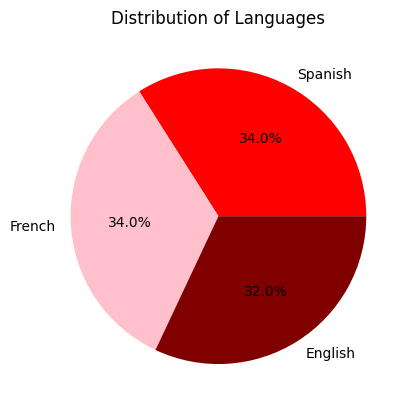

In [ ]:
diff_langs = df['language_preferred'].value_counts()
colors = ['red', 'pink', 'maroon']
plt.pie(diff_langs, labels = diff_langs.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Languages');

####Observations
Doing a diagnostic for the data collected, we can see that the observations have been really equally allocated among the various languages. This is reassuring so we can securely say that our A/B testing was done in a manner that was fair, inclusive, and representative.

### Bivariate Analysis

In [ ]:
treatment_mismatches = (df.loc[df['group'] == 'treatment', 'landing_page'] != 'new').sum()
control_mismatches = (df.loc[df['group'] == 'control', 'landing_page'] != 'old').sum()

print(f"Number of mismatches in treatment group: {treatment_mismatches}")
print(f"Number of mismatches in control group: {control_mismatches}")

Number of mismatches in treatment group: 0
Number of mismatches in control group: 0


####Observations
Though closely related, columns 'landing_page' and 'group' represent different things, yet should still align. In a perfectly conducted A/B test, participants in the control group see the old landing page, and participants in the treatment group see the new landing page. In practice, discrepancies can occur possibly due to technical or data documentation issues. So it's important to cross-check that data so we can move forward with confidence in our inferences. In our case, I tested for mismatches in data between the two columns and I am happy to report there are none.

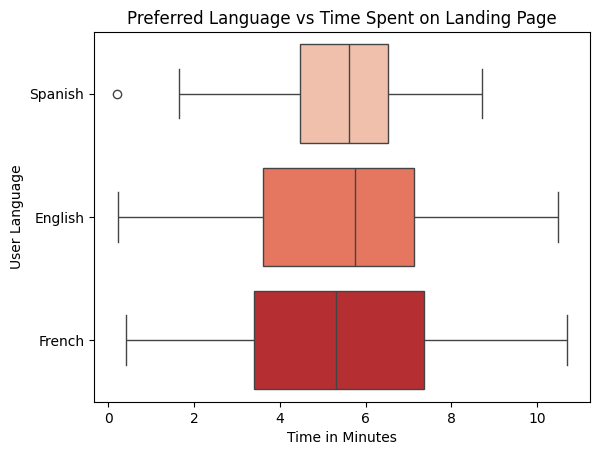

In [ ]:
sns.boxplot(data=df, x='time_spent_on_the_page', y='language_preferred', hue='language_preferred', palette='Reds')
plt.title('Preferred Language vs Time Spent on Landing Page')
plt.xlabel('Time in Minutes')
plt.ylabel('User Language');

####Observations
When plotting the opted language users visit the landing page is vs how long they stay on the page, we see many interesting findings. Firstly, the average time across all 3 languages stays pretty consistent between 5 to 6 minutes. Though all languages have similar dispersion, Spanish is the only language with an outlier. English and French IQR's are similar in size, while the Spanish IQR is the slimmest, indicating differences in variability. Both left and right whiskers seen on the French and English boxplots are comparable, and there is no dramatic skewing to note for any language.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

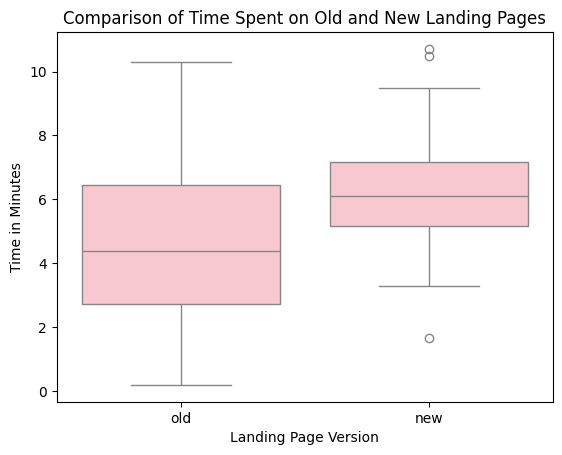

In [ ]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', color='pink')
plt.title('Comparison of Time Spent on Old and New Landing Pages')
plt.xlabel('Landing Page Version')
plt.ylabel('Time in Minutes');

Observations: Using boxplots to visualize time spent on the old versus new version of the landing page, it can be seen that the central tendencies differ and the old landing page has greater dispersion.

### Step 1: Define the null and alternate hypotheses

Representing the mean of the time in minutes spent on each landing page, new and old respectively, with $\mu_1, \mu_2$.

Null: Users spend the same amount of time on the new and existing landing page.

> $H_0: \mu_1=\mu_2$

Alternate: Users spend more time on the new landing page.

> $H_a: \mu_1≠\mu_2$

### Step 2: Select Appropriate test

Since we are testing equality of means for continuous data, where the standard deviation is known and the sample size is greater than 30 - meaning the Central Limit Theorm holds that the distribution of the sample will be normal - we can use: two-sample independent z-test

### Step 3: Decide the significance level

> α=0.05

### Step 4: Collect and prepare data

In [ ]:
print('The mean time in mins spent on the new page is ' + str(round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean(), 1)))
print('The mean time in mins spent on the old page is ' + str(round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean(), 1)))

The mean time in mins spent on the new page is 6.2
The mean time in mins spent on the old page is 4.5


When pulling the average amount of time for all users spent on the new landing page compared to the old one, there is a difference, but is it statistically significant?

### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.weightstats import ztest
new_page_data = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_page_data = df[df['landing_page'] == 'old']['time_spent_on_the_page']

z_statistic, p_value = ztest(new_page_data, old_page_data)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: 3.7867702694199856
P-value: 0.00015261808068832124


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00015261808068832124 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

If the p-value is low, the null hypothesis must go. At a 5% significance level, we must reject the null hypothesis. Therefore, we do not have enough statistical evidence to say that the mean time spent on the new and old landing pages are the same.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

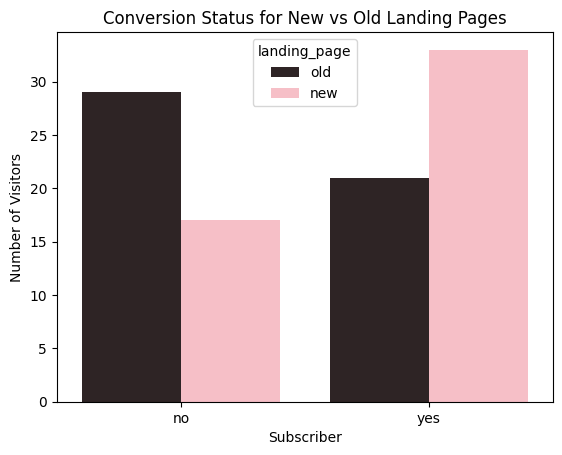

In [ ]:
sns.countplot(data=df, x='converted', hue='landing_page', palette='dark:lightpink')
plt.xlabel('Subscriber')
plt.ylabel('Number of Visitors')
plt.title('Conversion Status for New vs Old Landing Pages');

Observations: One of the easiest ways to preview the success of the new landing page is to measure using the ruler of if a visitor ultimately becomes a subscriber or not. The bar chart above helps us visualize the stark difference between conversion success on the new vs the old page. It is clear to see that there are less than 20 visitors to the new site who don't end up becoming patrons but there are more than 30 to the new page who become patrons. This chart may suggest dependency and a higher success rate from the new page, but let's test to see if we have the evidence to prove this statistically significant.

Defining my null and alternate hypotheses as the following:

> $H_0:$ Website version is independent of conversion rate

> $H_a:$ Website version and conversion rate are dependent variables

Setting my level of significance to:
>  α=0.05

As I am testing for independence of categorical variables, with random samples of more than 5 observations each, I will run a Chi-square test of independence.

In [ ]:
contingency_table = pd.crosstab(df['landing_page'],df['converted'])
contingency_table

converted,no,yes
landing_page,,
new,17,33
old,29,21


After some preperation of data, we can filter out the variables we are focusing on. This contingency table not only summarizes our focus points but also aids in running the Chi-square test.

In [ ]:
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', pval)

The p-value is 0.02730889175492232


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


The null hypothesis cannot be rejected with the obtained p-value exceeding the predetermined significance level. As a result, there is insufficient evidence at a 5% significance level to suggest that version of the website whether new or old actually has a relation to the conversion rate.

## 3. Is the conversion and preferred language independent or related?

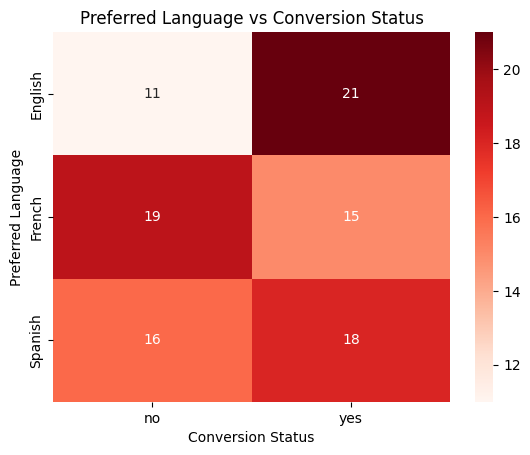

In [ ]:
pivot_table = df.pivot_table(index='language_preferred', columns='converted',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds')
plt.title('Preferred Language vs Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Preferred Language');

Observations: I want to visually represent whether or not certain languages have higher or lower conversion rates, so I opted to use a pivot table and heatmap. Looking at the results, the darkest color is subscribers in the English language, but we need to test if this is a suggestion of dependency, and if it is statistically significant or not.

Defining my null and alternate hypotheses as the following:

> $H_0:$ Preferred language is independent of conversion rate

> $H_a:$ Preferred language and conversion rate are dependent variables

Setting my level of significance to:
>  α=0.05

As I am testing for independence of categorical variables, with random samples of more than 5 observations each, I will run a Chi-square test of independence.

In [ ]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(pivot_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


The resulting p-value is higher than the previously assigned level of significance. Therefore, I fail to reject the null hypothesis. Consequently, there is insufficient evidence at a statistical significance level of 5% to conclude that language preference is independent of conversion rate.

## 4. Is the time spent on the new page same for the different language users?

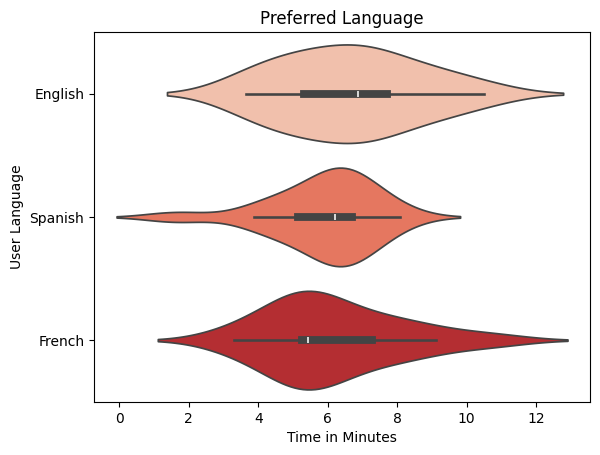

In [ ]:
sns.violinplot(data=df[df['landing_page'] == 'new'], x='time_spent_on_the_page', y='language_preferred', hue='language_preferred', palette='Reds')
plt.title('Preferred Language vs Time Spent on Landing Page')
plt.xlabel('Time in Minutes')
plt.ylabel('User Language')
plt.title('Preferred Language');

Observations: Opting for a violin plot to explore the relationship between language preference of the visitor and the length of their stay on the landing page. This allows me to visualize the distribution of the time, a numeric variable, for several groups, the multiple languages. Though central tendencies are slightly similar (more so English and French, less so Spanish), viewing the data in this manner gives us key insight into the density estimates on the y-axis. This is helpful as we can always compare means and outliers, but mode may suggest a different story in regards to time on the landing page. For example, from these plots one could say French and English language users interact with the website for longer amounts of time than Spanish-language users. Lastly, we can see Spanish language users have an ever so slight skew.

Defining my null and alternate hypotheses as the following:

Assigning $\mu_1, \mu_2, \mu_3$ be the means of time spent in minutes on the landing page for each preferred language, English, French, and Spanish respectively.

>$H_0: \mu_1 = \mu_2 = \mu_3$

>$H_a:$ At least one chosen language averages a different amount of time spent on the landing page compared to the rest.

Setting my level of significance to:
>  α=0.05

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

As I am looking to compare the means of three groups, I can run the ANOVA test, but prior to that it is crucial to ensure that the assumptions are met including:
*   Normality - testing that data was drawn from a normal distribution
*   Homogeneity of Variances - testing the variance is equal across groups

Shapiro-Wilk's to test normality

>$H_0:$ Time spent on landing page follows a normal distribution

>$H_a:$ Time spent on landing page does not follow a normal distribution

In [ ]:
from scipy import stats
w, p_value = stats.shapiro(df['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.5643193125724792


Due to the test's significantly high p-value, one that is greater than the level of significance, we cannot reject the null hypothesis, indicating that the data adheres to a normal distribution.

Levene's to test equal variences

>$H_0$: All 3 preferred languages display equal variances

>$H_a$: At least one preferred language displays a variance different from the rest

In [ ]:
from scipy.stats import levene
statistic, p_value = levene(df['time_spent_on_the_page'][df['language_preferred']=="English"],
                                   df['time_spent_on_the_page'][df['language_preferred']=="French"],
                                   df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Given the large p-value, greater than the level of significance, we fail to reject the null hypothesis of homogeneity of variances.

Two failures shouldn't make a success but in our lucky case, since both null hypotheses for the Shapiro-Wilk's and Levene's test experienced failure to be rejected, this is a great sign. Results of these test indicate that assumptions for the ANOVA test have been satisfied: the populations are normally distributed (S-W) and the population variances are equal (L). Before conducting ANOVA, we have one more assumption to verify which is that samples are independent simple random samples, which was provided to us as true per company. Let's run a one-way ANOVA

In [ ]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8665610536012648


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


The obtained p-value exceeds the predetermined significance threshold of 0.05, leading to the acceptance of the null hypothesis. Thus, at a 5% level of statistical significance, there is inadequate evidence to assert that language preference has an effect on the amount of time spent on the website.

## Conclusion and Business Recommendations

After thourough investigation of all variables given to the team at E-News Express, we can confirm that

___